# EDA of Toyota by using Barplot

### Import required libraries and packages

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read a csv file as pandas DataFrame

In [35]:
df = pd.read_csv("toyota.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


### Create a function to find the number of obsevations for unique value in a column of a DataFrame

In [36]:
def unique_percent_count(data, col):
    
    col_count = data[col].value_counts(normalize = True)
    col_count = col_count*100
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    col_count['% of cars'] = col_count['% of cars'].round(2)

    return col_count

In [37]:
fuelType_count = unique_percent_count(df, "fuelType")
transmission_count = unique_percent_count(df, "transmission")
model_count = unique_percent_count(df, "model")
year_count = unique_percent_count(df, "year")
year_count = year_count.sort_values(by = "year")

### Create a function to show the number of observations for each unique value in a column using a Barplot

In [38]:
def barplot(data, x_col, y_col,color, yticks, rotation):
    
    sns.barplot(x=x_col, y = y_col, data=data, color =color)
    plt.title("Percentage of cars Percentage for each " + x_col)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)

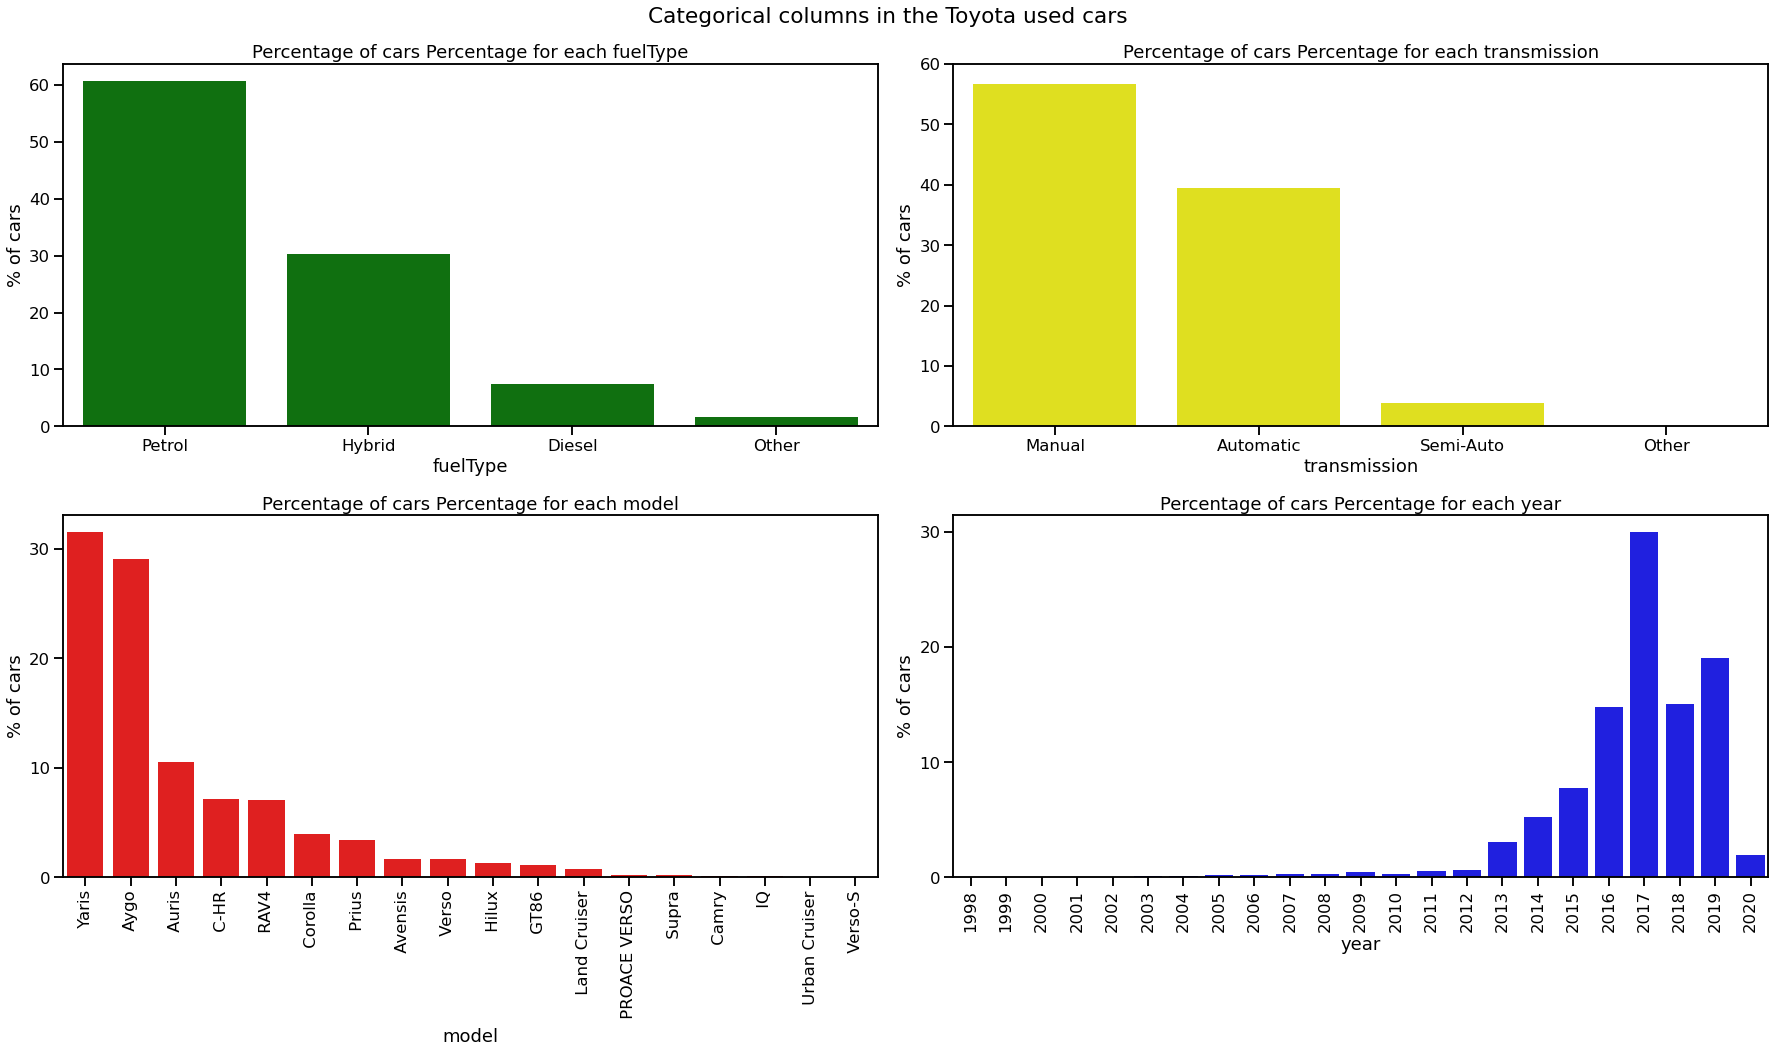

In [39]:
sns.set_context("talk")

plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
barplot(fuelType_count,"fuelType", "% of cars", "green",np.arange(0,70,10), 0)

plt.subplot(2,2,2)
barplot(transmission_count,"transmission", "% of cars","yellow",np.arange(0,70,10), 0)

plt.subplot(2,2,3)
barplot(model_count, "model", "% of cars", "red", np.arange(0,40,10), 90)

plt.subplot(2,2,4)
barplot(year_count, "year", "% of cars","blue",np.arange(0,40,10), 90)

plt.suptitle('Categorical columns in the Toyota used cars')

plt.tight_layout()